In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_steam_games = pd.read_parquet('Data/steam_games_ml.parquet')
df_user_items = pd.read_parquet('Data/user_items.parquet')
df_user_reviews = pd.read_parquet('Data/user_reviews.parquet')


In [3]:
df_user_items.isnull().sum()

item_id             0
playtime_forever    0
user_id             0
dtype: int64

In [4]:
df_steam_games.isnull().sum()

app_name                       0
price                          0
item_id                        0
developer                      0
release_year                   0
'Accounting'                   0
'Action'                       0
'Adventure'                    0
'Animation &amp; Modeling'     0
'Audio Production'             0
'Casual'                       0
'Design &amp; Illustration'    0
'Early Access'                 0
'Education'                    0
'Free to Play'                 0
'Indie'                        0
'Massively Multiplayer'        0
'Photo Editing'                0
'RPG'                          0
'Racing'                       0
'Simulation'                   0
'Software Training'            0
'Sports'                       0
'Strategy'                     0
'Utilities'                    0
'Video Production'             0
'Web Publishing'               0
dtype: int64

In [5]:
df_user_reviews.isnull().sum()

item_id               0
recommend             0
user_id               0
sentiment_analysis    0
year                  0
dtype: int64

In [7]:
df_user_reviews.head(1)

,item_id,recommend,user_id,sentiment_analysis,year
0,1250,True,76561197970982479,2,2011


In [9]:
df_reviews_games= pd.merge(df_steam_games, df_user_reviews, on='item_id')

In [11]:
df_user_items.head(1)

,item_id,playtime_forever,user_id
0,10,6,76561197970982479


### Análisis de juegos

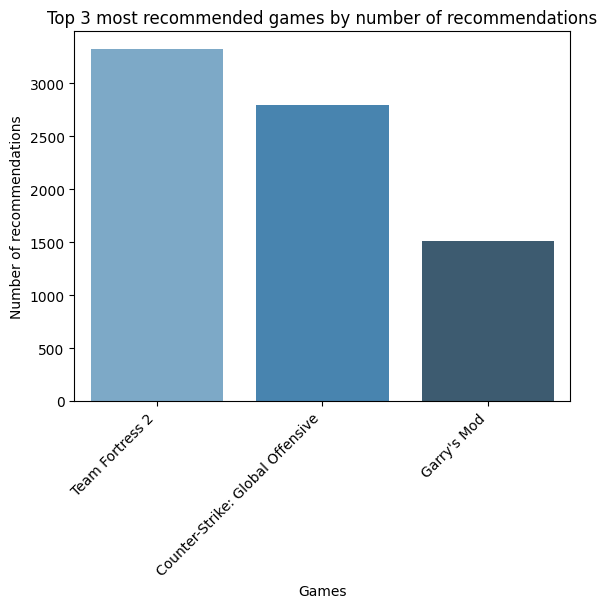

In [13]:
# Filter rows with recommend=True
df_reviews_true = df_reviews_games[df_reviews_games['recommend'] == True]

# Count the number of recommendations per item_id
recommendations_per_item = df_reviews_true.groupby('item_id')['recommend'].count().reset_index()

# Sort in descending order
recommendations_per_item = recommendations_per_item.sort_values(by='recommend', ascending=False)

# Take the top 3 items
top_3_recommendations = recommendations_per_item.head(3)

# Merge with df_steam to get item names
top_3_most_recommended = pd.merge(top_3_recommendations, df_steam_games[['item_id', 'app_name']], left_on='item_id', right_on='item_id', how='left')

# Create a bar chart using Seaborn
ax = sns.barplot(x='app_name', y='recommend', data=top_3_most_recommended, palette='Blues_d')

# Add labels to the chart
plt.xlabel('Games')
plt.ylabel('Number of recommendations')
plt.title('Top 3 most recommended games by number of recommendations')

# Rotate x-axis labels for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Show the chart
plt.show()


In [23]:
merged_df = df_user_items.merge(df_steam_games[['item_id', 'app_name']], on='item_id', how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094092 entries, 0 to 5094091
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   playtime_forever  int64 
 2   user_id           object
 3   app_name          object
dtypes: int64(2), object(2)
memory usage: 155.5+ MB


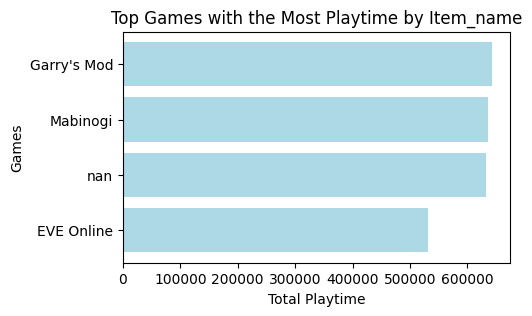

In [24]:

# Select the top 7 games played based on playtime_forever
top_games_played = merged_df.sort_values(by='playtime_forever', ascending=False).head(7)

# Convert the 'app_name' column to strings
top_games_played['app_name'] = top_games_played['app_name'].astype(str)

# Set the figure size
plt.figure(figsize=(5, 3))

# Create a horizontal bar chart
plt.barh(top_games_played['app_name'], top_games_played['playtime_forever'], color='lightblue')

# Set the X-axis label
plt.xlabel('Total Playtime')

# Set the Y-axis label
plt.ylabel('Games')

# Set the chart title
plt.title('Top Games with the Most Playtime by Hours')

# Invert the Y-axis to have the game with the most playtime at the top
plt.gca().invert_yaxis()

# Show the chart
plt.show()


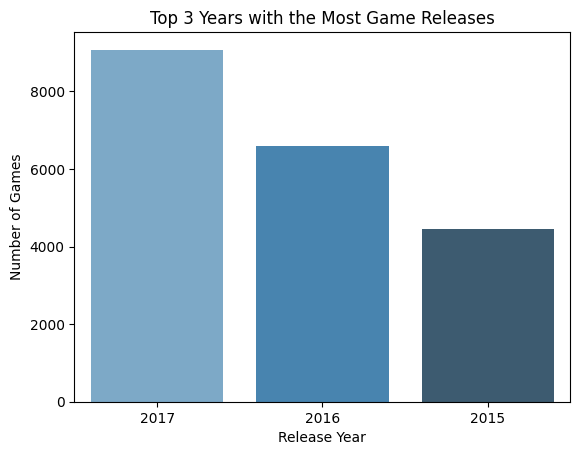

In [25]:
# Copy the original DataFrame
df_steam_copia = df_steam_games.copy()

# Calculate the number of games released per year and get the top 3
cantidad_juegos_por_año = df_steam_copia.groupby('release_year').size().sort_values(ascending=False).head(3)

# Create a bar chart using Seaborn
sns.barplot(x=cantidad_juegos_por_año.index, y=cantidad_juegos_por_año.values, palette='Blues_d')

plt.xlabel('Release Year')
plt.ylabel('Number of Games')
plt.title('Top 3 Years with the Most Game Releases')


plt.show()

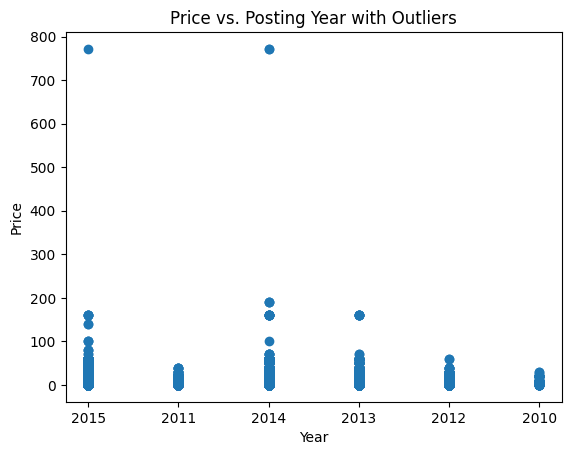

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of 'posted_year' vs. 'price'
plt.scatter(df_reviews_games['year'], df_reviews_games['price'])

# Set the X-axis label
plt.xlabel('Year')

# Set the Y-axis label
plt.ylabel('Price')

# Set the title of the plot
plt.title('Price vs. Posting Year with Outliers')

# Show the plot
plt.show()


### We can see that there are outliers in the price, reaching almost $800.

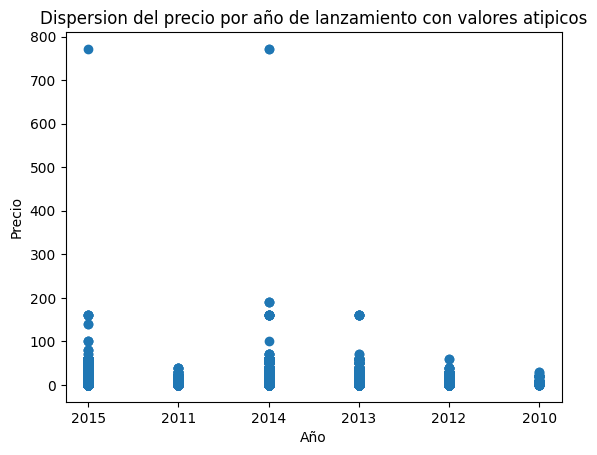

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(df_reviews_games['release_year'], df_reviews_games['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Dispersion del precio por año de lanzamiento con valores atipicos')
plt.show()

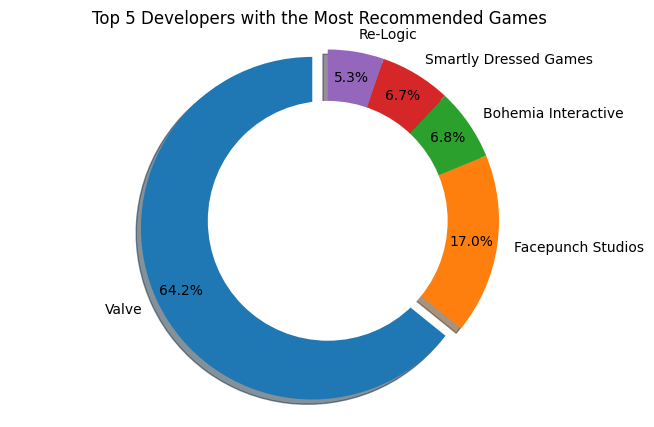

In [52]:
# Group the games by developer and filter recommended games
games_by_developer = df_reviews_games.loc[df_reviews_games['recommend'] == True].groupby('developer')['developer'].count().nlargest(5)

# Create a list of explosion values to highlight the sector of the chart for the developer with the most recommended games
explode = [0.1 if i == games_by_developer.max() else 0 for i in games_by_developer]

# Create a donut chart using Matplotlib and set the explosion and shadow values
fig, ax = plt.subplots(figsize=(8, 5))
ax.pie(games_by_developer, labels=games_by_developer.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode, shadow=True)
ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add a title to the chart
plt.title('Top 5 Developers with the Most Recommended Games')

# Show the chart
plt.show()
